In [1]:
import proteosim as ps
from pyteomics import achrom

In [2]:
protein_map = ps.read_fasta("data/sample_proteins.fasta")
len(protein_map)

>sp|P11802|CDK4_HUMAN Cyclin-dependent kinase 4 OS=Homo sapiens OX=9606 GN=CDK4 PE=1 SV=2

P11802
MATSRYEPVAEIGVGAYGTVYKARDPHSGHFVALKSVRVPNGGGGGGGLPISTVREVALL

RRLEAFEHPNVVRLMDVCATSRTDREIKVTLVFEHVDQDLRTYLDKAPPPGLPAETIKDL

MRQFLRGLDFLHANCIVHRDLKPENILVTSGGTVKLADFGLARIYSYQMALTPVVVTLWY

RAPEVLLQSTYATPVDMWSVGCIFAEMFRRKPLFCGNSEADQLGKIFDLIGLPPEDDWPR

DVSLPRGAFPPRGPRPVQSVVPEMEESGAQLLLEMLTFNPHKRISAFRALQHSYLHKDEG

NPE

>sp|A0A087WTH1|TM265_HUMAN Transmembrane protein 265 OS=Homo sapiens GN=TMEM265 PE=3 SV=1

A0A087WTH1
MEDEEKAVEILGNTEAAHPPSPIRCCWLRLRCLAATSIICGCSCLGVMALVFAIKAEERH

KAGRSEEAVRWGARARKLILASFAVWLAVLILGPLLLWLLSYAIAQAPEPTIDERE

>tr|A0A087WTH5|A0A087WTH5_HUMAN Protein LOC102723475 OS=Homo sapiens GN=LOC102723475 PE=4 SV=2

A0A087WTH5
MVIEWERPRMILSNTTAVTPFLTKLWQETVQQGGNMSGLARRSPRSGDGKLEALYVLMVLGFFGFF

TLGIMLSYIRSKKLEHSNDPFNVYIESNAWQEKDKAYVQARVLESYRSCYVVENHLAIEQ

PNTHLPETKPSP



3

In [3]:
seq = protein_map['A0A087WTH1']
cleave_pattern = ps.enzyme_cleavage_patterns['Trypsin']
ps.digest_protein_sequence(seq, cleave_pattern=cleave_pattern)

['MEDEEK',
 '',
 'AVEILGNTEAAHPPSPIR',
 '',
 'CCWLR',
 '',
 'LR',
 '',
 'CLAATSIICGCSCLGVMALVFAIK',
 '',
 'AEER',
 '',
 'HK',
 '',
 'AGR',
 '',
 'SEEAVR',
 '',
 'WGAR',
 '',
 'AR',
 '',
 'K',
 '',
 'LILASFAVWLAVLILGPLLLWLLSYAIAQAPEPTIDER',
 '',
 'E']

In [4]:
cleave_pattern = ps.enzyme_cleavage_patterns['Trypsin']

digested_peptides_map = ps.digest_protein_collection(
    protein_map,       
    cleave_pattern,    
    min_pep_len=5,      
    max_pep_len=30      
)


digested_peptides_map

{'P11802': ['MATSR',
  'YEPVAEIGVGAYGTVYK',
  'DPHSGHFVALK',
  'VPNGGGGGGGLPISTVR',
  'EVALLR',
  'LEAFEHPNVVR',
  'LMDVCATSR',
  'VTLVFEHVDQDLR',
  'TYLDK',
  'APPPGLPAETIK',
  'GLDFLHANCIVHR',
  'DLKPENILVTSGGTVK',
  'LADFGLAR',
  'IYSYQMALTPVVVTLWYR',
  'APEVLLQSTYATPVDMWSVGCIFAEMFR',
  'KPLFCGNSEADQLGK',
  'IFDLIGLPPEDDWPR',
  'DVSLPR',
  'GAFPPR',
  'GPRPVQSVVPEMEESGAQLLLEMLTFNPHK',
  'ISAFR',
  'ALQHSYLHK',
  'DEGNPE'],
 'A0A087WTH1': ['MEDEEK',
  'AVEILGNTEAAHPPSPIR',
  'CCWLR',
  'CLAATSIICGCSCLGVMALVFAIK',
  'SEEAVR'],
 'A0A087WTH5': ['MVIEWERPR',
  'MILSNTTAVTPFLTK',
  'LWQETVQQGGNMSGLAR',
  'SGDGK',
  'LEALYVLMVLGFFGFFTLGIMLSYIR',
  'LEHSNDPFNVYIESNAWQEK',
  'AYVQAR',
  'VLESYR',
  'SCYVVENHLAIEQPNTHLPETKPSP']}

In [5]:
prot_seq = protein_map['A0A087WTH1']
peps = ['A0A087WTH1']

ps.compute_sequence_coverage(prot_seq, peps)

0.0

In [25]:
import pickle

pickle_path =  '/Users/paulinekipp/Documents/GitHub/advanced-python_course/results/digested_peptides_map.pkl'  
with open(pickle_path, 'rb') as handle:
    digested_peptides_map = pickle.load(handle)

len(digested_peptides_map)
pooled_peptides = [pep for peplist in digested_peptides_map.values() for pep in peplist] 
print(f'Total peptides: {len(pooled_peptides)}')

Total peptides: 37


In [7]:
rt_map = ps.predict_lc_retention_times(pooled_peptides)

rt_map
print(rt_map)

{'MATSR': np.float64(8.9), 'YEPVAEIGVGAYGTVYK': np.float64(42.7), 'DPHSGHFVALK': np.float64(29.0), 'VPNGGGGGGGLPISTVR': np.float64(31.6), 'EVALLR': np.float64(25.5), 'LEAFEHPNVVR': np.float64(33.5), 'LMDVCATSR': np.float64(23.6), 'VTLVFEHVDQDLR': np.float64(41.0), 'TYLDK': np.float64(11.1), 'APPPGLPAETIK': np.float64(29.1), 'GLDFLHANCIVHR': np.float64(47.5), 'DLKPENILVTSGGTVK': np.float64(34.5), 'LADFGLAR': np.float64(29.5), 'IYSYQMALTPVVVTLWYR': np.float64(78.1), 'APEVLLQSTYATPVDMWSVGCIFAEMFR': np.float64(96.2), 'KPLFCGNSEADQLGK': np.float64(28.0), 'IFDLIGLPPEDDWPR': np.float64(51.3), 'DVSLPR': np.float64(14.7), 'GAFPPR': np.float64(16.3), 'GPRPVQSVVPEMEESGAQLLLEMLTFNPHK': np.float64(80.9), 'ISAFR': np.float64(19.9), 'ALQHSYLHK': np.float64(28.5), 'DEGNPE': np.float64(-4.0), 'MEDEEK': np.float64(-0.7), 'AVEILGNTEAAHPPSPIR': np.float64(43.8), 'CCWLR': np.float64(24.6), 'CLAATSIICGCSCLGVMALVFAIK': np.float64(96.2), 'SEEAVR': np.float64(5.7), 'MVIEWERPR': np.float64(30.9), 'MILSNTTAVTPFL

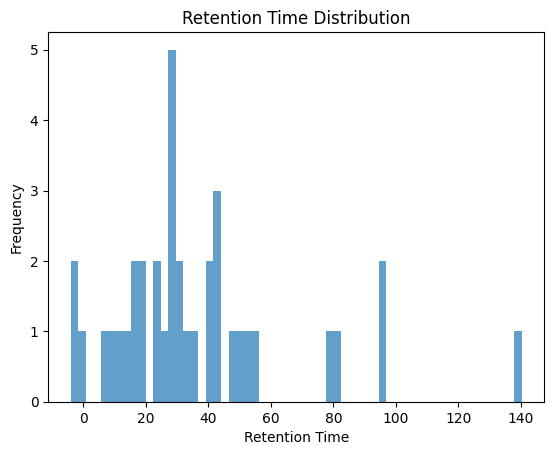

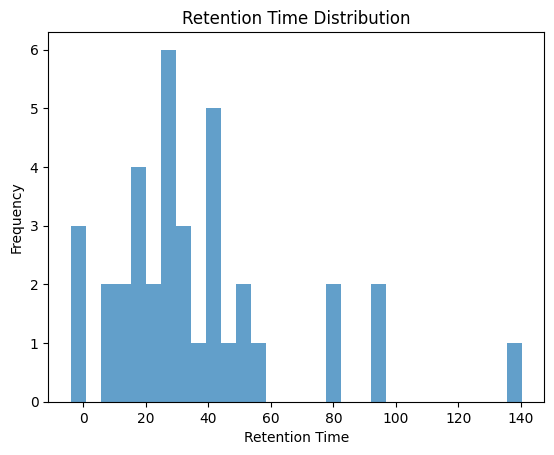

In [8]:
retention_time = ps.predict_lc_retention_times(rt_map)
ps.plot_retention_time(retention_time.values(), resolution=60)
ps.plot_retention_time(retention_time.values(), resolution=30)

In [9]:

select_peps = ps.select_retention_time_window(
    peptide_rt_map=rt_map,
    lower_ret_time=0,
    upper_ret_time=20,
)

len(select_peps)

8

In [10]:
ps.calculate_mol_mass('PEPTIDE', ps.amino_acid_mass_dalton)

{'PEPTIDE': 781.84}

In [11]:
mass_map_ms1 = ps.calculate_mol_mass_collection(select_peps, ps.amino_acid_mass_dalton)
mass_map_ms1

{'MATSR': 546.65,
 'TYLDK': 620.71,
 'DVSLPR': 667.77,
 'GAFPPR': 625.74,
 'ISAFR': 574.69,
 'SEEAVR': 671.72,
 'AYVQAR': 688.79,
 'VLESYR': 747.8599999999999}

In [12]:
mz1_map = ps.calculate_mz_collection(mass_map_ms1, charge=2)
mz1_map

{'MATSR': 274.332,
 'TYLDK': 311.362,
 'DVSLPR': 334.892,
 'GAFPPR': 313.877,
 'ISAFR': 288.35200000000003,
 'SEEAVR': 336.867,
 'AYVQAR': 345.402,
 'VLESYR': 374.93699999999995}

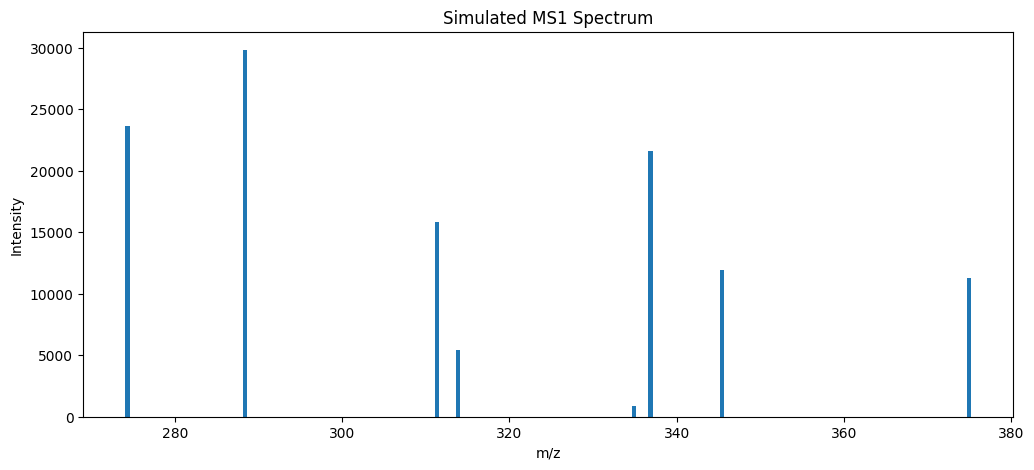

In [18]:
ps.plot_spectrum(list(mz1_map.values()), seed=42)

In [19]:
mypep = 'MATSR'
frags = ps.fragment_peptide(mypep)
frags

['M', 'MA', 'MAT', 'MATS', 'R', 'SR', 'TSR', 'ATSR']

In [20]:
mass_map_ms2 = ps.calculate_mol_mass_collection(frags, ps.amino_acid_mass_dalton)
mass_map_ms2

{'M': 131.19,
 'MA': 202.26999999999998,
 'MAT': 303.38,
 'MATS': 390.46,
 'R': 156.19,
 'SR': 243.26999999999998,
 'TSR': 344.38,
 'ATSR': 415.46}

In [21]:
mz2_map = ps.calculate_mz_collection(mass_map_ms2, charge=1)
mz2_map

{'M': 132.197,
 'MA': 203.277,
 'MAT': 304.387,
 'MATS': 391.467,
 'R': 157.197,
 'SR': 244.277,
 'TSR': 345.387,
 'ATSR': 416.467}

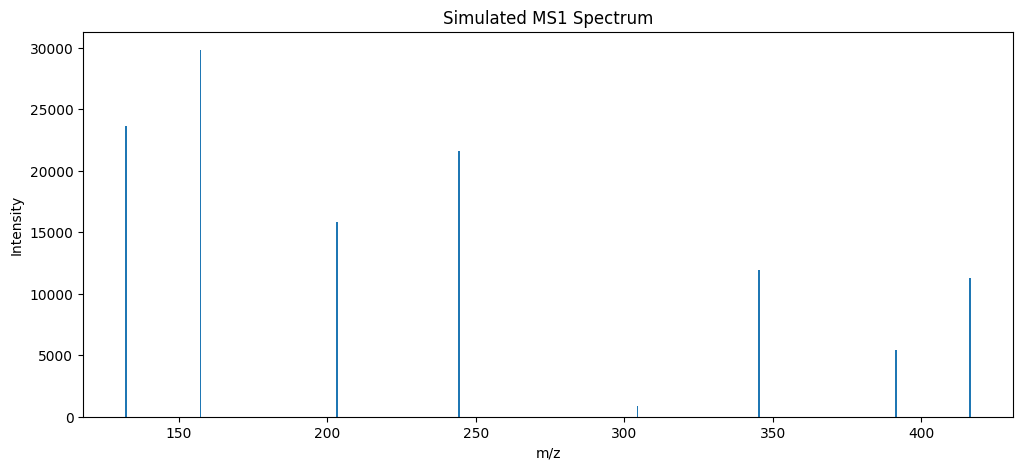

In [22]:
ps.plot_spectrum(list(mz2_map.values()), seed=42)